<a href="https://colab.research.google.com/github/juanpablolopezmacias-eng/Estad-stica2025B/blob/main/Salary_dataset_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

233.55466666666666
21794977852.0
2207082.8
coeficiente de correlacion= 0.9782
coeficiente de correlacion (forma facil)=                  Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000
coeficiente de correlacion PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
0.9569566641435082
PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
parametros: const              24848.203967
YearsExperience     9449.962321
dtype: float64


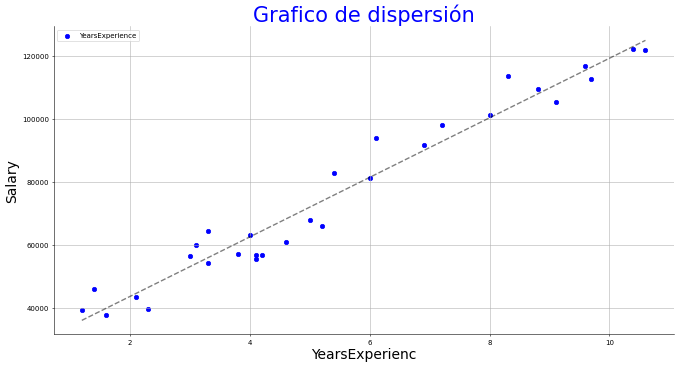


Coeficiente de determinafion= 0.957

 intervalo de confianza:                             0             1
const            20123.238035  29573.169898
YearsExperience   8674.118747  10225.805896


/tmp/ipython-input-1866133293.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


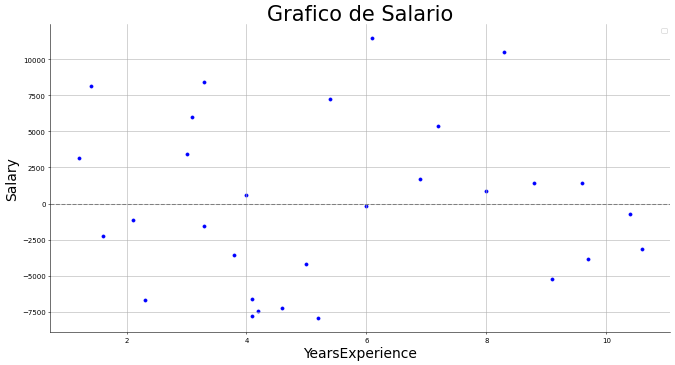

valor_p(shapiro)=  0.1952218633400829
valor_p de Breusch-Pagan: 0.5276

x=1 [34298.16628798]
x=6 [81547.97789525]

Ultimo paso


,df,sum_sq,mean_sq,F,PR(>F)
Salary,1.0,223.501695,223.501695,622.507203,1.143068e-20
Residual,28.0,10.052972,0.359035,NaN,NaN


In [14]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/juanpablolopezmacias-eng/Estad-stica2025B/refs/heads/main/CSV")
df
x=df["YearsExperience"]
y=df["Salary"]
#2) Grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x, y, label="YearsExperience", color="blue", s=40)
plt.xlabel("YearsExperienc", fontsize= 20)
plt.ylabel("Salary", fontsize= 20)
plt.title("Grafico de dispersión", color= "blue", fontsize= 30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#plt.show()

#3) ¿Los datos soportan la suposición de linealidad?
#si

#4) Calcule el coeficiente de correlación e interprete el resultado.
Sxx=((x - x.mean())**2).sum()
print(Sxx)
Syy= ((y - y.mean())**2).sum()
print(Syy)
Sxy= ((x - x.mean())*(y-y.mean())).sum()
print(Sxy)
from math import sqrt
r= Sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=", round(r,4))
print("coeficiente de correlacion (forma facil)=", df.corr())
from scipy.stats import pearsonr
print("coeficiente de correlacion", pearsonr(x,y))

#5) Calcule el coeficiente de determinación e interprete el resultado.
print(r**2)
r= pearsonr(x,y)
print(r)

#6) Obtenga la recta de regresión ajustada y grafíquelo en el gráfico de
#dispersión
import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
print("parametros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\nCoeficiente de determinafion=", round(r2,4))

#7) Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:", intervalo_de_confianza)

#8) Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
#¿Parece que se verifican los supuestos?
import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x,residuales, color="blue",s=20)
plt.xlabel("YearsExperience", fontsize=20)
plt.ylabel("Salary", fontsize=20)
plt.title("Grafico de Salario", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.axhline(y=0,color="gray", linestyle="--")
plt.show()

#9) Realice la prueba de Shapiro para los resultados y comente el resultado.
from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro= shapiro(residuales)
print("valor_p(shapiro)= ", valor_p_shapiro)

#10) Tes de breusch-pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp:0.4f}\n')
#si hay homoscedacidad por el valor_p

#11) ¿cuáles son los resultados esperados para estos tres alumnos?
print("x=1", modelo.predict([1,1]))
print("x=6", modelo.predict([1,6]))

#12) Realice una tabla ANOVA e interprete el resultado.
print("\nUltimo paso")
from statsmodels.formula.api import ols
modelo_lineal=ols( "YearsExperience~Salary", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

233.5546666666667
21794977852.0
2207082.8
coeficiente de correlacion= 0.9782
coeficiente de correlacion (forma facil)=                  examenes_cortos  promedio_final
examenes_cortos         1.000000        0.978242
promedio_final          0.978242        1.000000
coeficiente de correlacion PearsonRResult(statistic=np.float64(0.9782416184887599), pvalue=np.float64(1.1430681092271562e-20))
0.9569566641435082
PearsonRResult(statistic=np.float64(0.9782416184887599), pvalue=np.float64(1.1430681092271562e-20))
parametros: const              24848.203967
examenes_cortos     9449.962321
dtype: float64


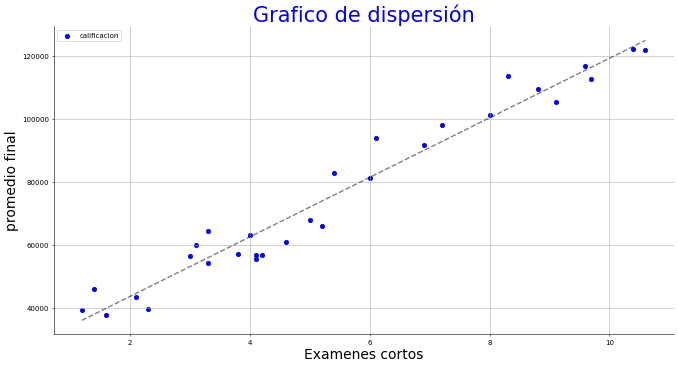


Coeficiente de determinafion= 0.957

 intervalo de confianza:                             0             1
const            20123.238035  29573.169898
examenes_cortos   8674.118747  10225.805896


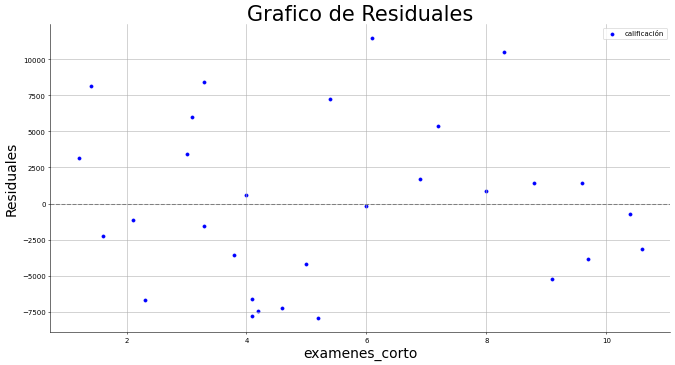

valor_p(shapiro)=  0.19522186334007607
valor_p de Breusch-Pagan: 0.5276

x=70, [686345.56646838]
x=80, [780845.18968293]
x=84, [818645.03896875]

Ultimo paso


,df,sum_sq,mean_sq,F,PR(>F)
examenes_cortos,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


In [3]:
import pandas as pd
df=pd.read_csv(" ")
import pandas as pd
df= pd.DataFrame({
    "examenes_cortos":[1.2, 1.4, 1.6, 2.1, 2.3, 3.0, 3.1, 3.3, 3.3, 3.8, 4.0,https://raw.githubusercontent.com/juanpablolopezmacias-eng/Estad-stica2025B/refs/heads/main/CSV
                       4.1, 4.1, 4.2, 4.6, 5.0, 5.2, 5.4, 6.0, 6.1, 6.9, 7.2,
                       8.0, 8.3, 8.8, 9.1, 9.6, 9.7, 10.4, 10.6],
    "promedio_final":[39344.0, 46206.0, 37732.0, 43526.0, 39892.0, 56643.0,
                      60151.0, 54446.0, 64446.0, 57190.0, 63219.0, 55795.0,
                      56958.0, 57082.0, 61112.0, 67939.0, 66030.0, 83089.0,
                      81364.0, 93941.0, 91739.0, 98274.0, 101303.0, 113813.0,
                      109432.0, 105583.0, 116970.0, 112636.0, 122392.0,
                      121873.0]})
#1) Establesca una variable dependiente ( Y ) y una variable independiente ( X )
x= df ["examenes_cortos"]
y= df ["promedio_final"]

#2) Grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x, y, label="calificacion", color="blue", s=40)
plt.xlabel("Examenes cortos", fontsize= 20)
plt.ylabel("promedio final", fontsize= 20)
plt.title("Grafico de dispersión", color= "blue", fontsize= 30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#plt.show()
#3) ¿Los datos soportan la suposición de linealidad? no soporto la linealidad
#4) Calcule el coeficiente de correlación e interprete el resultado.
Sxx=((x - x.mean())**2).sum()
print(Sxx)
Syy= ((y - y.mean())**2).sum()
print(Syy)
Sxy= ((x - x.mean())*(y-y.mean())).sum()
print(Sxy)
from math import sqrt
r= Sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=", round(r,4))
print("coeficiente de correlacion (forma facil)=", df.corr())
from scipy.stats import pearsonr

print("coeficiente de correlacion", pearsonr(x,y))
# "~" significa depende de ejemplo x~y
#r= coeficiente de correlacion
# r**2 = coeficiente de determinacion
#5) Calcule el coeficiente de determinación e interprete el resultado.
print(r**2)
r= pearsonr(x,y)
print(r)

#6) Obtenga la recta de regresión ajustada y grafíquelo en el gráfico de
#dispersión

import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
#respuesta y=24.53 + 0.643x
print("parametros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\nCoeficiente de determinafion=", round(r2,4))
#7) Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza

print("\n intervalo de confianza:", intervalo_de_confianza)
#8) Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
#¿Parece que se verifican los supuestos?
import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x,residuales, label="calificación", color="blue",s=20)
plt.xlabel("examenes_corto", fontsize=20)
plt.ylabel("Residuales", fontsize=20)
plt.title("Grafico de Residuales", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()

plt.axhline(y=0,color="gray", linestyle="--")
plt.show()
#el test de shapiro es para menores de 30 y el test de breusch pagan para más de
#30

#9) Tes de shapiro
#H0: hay normalidad
#Hi: no hay normalidad
# sig.: 0.05

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro= shapiro(residuales)
print("valor_p(shapiro)= ", valor_p_shapiro)

#hay normalidad, por lo tanto se acepta la hippteis nula

#10) Tes de breusch-pagan
#H0: hay homostedscidad
#Hi: no hay homocedasticidad
#sig.: 0.05

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp:0.4f}\n')

#comoes mayor el valor pe que el nivel de significancia si hya homocedasticidad
#por lo tanto se acepta la hipotesis nula

#11) ¿cuáles son los resultados esperados para estos tres alumnos?
modelo.params
#f(70)= 24.52 + 0.64(70)= 69.53
print("x=70,", modelo.predict([1,70]))
#f(80)= 24.52 + 0.64(80)= 75.72
print("x=80,", modelo.predict([1,80]))
#f(84)= 24.52 + 0.64(84)= 78.28
print("x=84,", modelo.predict([1,84]))

#12) Realice una tabla ANOVA e interprete el resultado.
print("\nUltimo paso")
from statsmodels.formula.api import ols
modelo_lineal=ols("promedio_final ~ examenes_cortos", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova
